# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
# importando bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
# abrindo o dataFrame a partir do site UCI

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# acrescentando uma coluna "flag_doente" com todos num diferentes de zero
# flag_doente (0 = saudável; 1 = doente)

df['flag_doente'] = (df['num'] != 0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [8]:
# sex: sexo (1 = male; 0 = female)
# flag_doente: (0 = saudável; 1 = doente)

tab = pd.crosstab(df['sex'], df['flag_doente'], margins= True)
tab


flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [10]:
# Número de saudáveis

tab[0]

sex
0.0     72
1.0     92
All    164
Name: 0, dtype: int64

In [11]:
# Número de doentes

tab[1]

sex
0.0     25
1.0    114
All    139
Name: 1, dtype: int64

In [12]:
# Total

tab['All']

sex
0.0     97
1.0    206
All    303
Name: All, dtype: int64

In [14]:
# Quantidade média de doentes

tab['probabilidade'] = tab[1]/tab['All']
tab['probabilidade']

sex
0.0    0.257732
1.0    0.553398
All    0.458746
Name: probabilidade, dtype: float64

In [16]:
# Odds - change 

tab['chance'] = tab[1]/tab[0]
tab['chance']

sex
0.0    0.347222
1.0    1.239130
All    0.847561
Name: chance, dtype: float64

In [18]:
# Odds ratio (Use o total como referência)

tab.loc['All','chance']

tab['RC_vs_All'] = tab['chance']/tab.loc['All','chance']
tab

flag_doente,0,1,All,probabilidade,chance,RC_vs_All
sex,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672
1.0,92,114,206,0.553398,1.239130,1.461996
All,164,139,303,0.458746,0.847561,1.000000


In [23]:
# Logito (LOG(Odds))

logito = np.log(tab['chance'])

print("Logito (LOG(Odds)):", logito)

Logito (LOG(Odds)): sex
0.0   -1.057790
1.0    0.214410
All   -0.165392
Name: chance, dtype: float64


In [24]:
# O LOG do Odds ratio (com o total como referência) é chamado de Weight of Evidence (WOE). Calcule-o

WOE = np.log(tab['RC_vs_All'])

print("Logito (WOE):", WOE)


Logito (WOE): sex
0.0   -0.892398
1.0    0.379802
All    0.000000
Name: RC_vs_All, dtype: float64


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [25]:
# Monte uma bivariada para a variável "age" com as seguintes estatísticas

# age: 
# flag_doente: (0 = saudável; 1 = doente)

tab = pd.crosstab(df['age'], df['flag_doente'], margins= True)
tab

flag_doente,0,1,All
age,,,
29.0,1,0,1
34.0,2,0,2
35.0,2,2,4
37.0,2,0,2
38.0,1,1,2
39.0,3,1,4
40.0,1,2,3
41.0,9,1,10
42.0,7,1,8


In [26]:
# Categorize a variável em 5 grupos

df['idade_grupo'] = pd.qcut(df['age'], q=5, labels=['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5'])
df['idade_grupo']

0      Grupo 5
1      Grupo 5
2      Grupo 5
3      Grupo 1
4      Grupo 1
        ...   
298    Grupo 1
299    Grupo 5
300    Grupo 3
301    Grupo 3
302    Grupo 1
Name: idade_grupo, Length: 303, dtype: category
Categories (5, object): ['Grupo 1' < 'Grupo 2' < 'Grupo 3' < 'Grupo 4' < 'Grupo 5']

In [27]:
# idade_grupo: 'Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5'
# flag_doente: (0 = saudável; 1 = doente)

tab = pd.crosstab(df['idade_grupo'], df['flag_doente'], margins= True)
tab

flag_doente,0,1,All
idade_grupo,,,
Grupo 1,47,16,63
Grupo 2,42,22,64
Grupo 3,32,39,71
Grupo 4,13,32,45
Grupo 5,30,30,60
All,164,139,303


In [28]:
# Número de saudáveis

tab[0]

idade_grupo
Grupo 1     47
Grupo 2     42
Grupo 3     32
Grupo 4     13
Grupo 5     30
All        164
Name: 0, dtype: int64

In [29]:
# Número de doentes

tab[1]

idade_grupo
Grupo 1     16
Grupo 2     22
Grupo 3     39
Grupo 4     32
Grupo 5     30
All        139
Name: 1, dtype: int64

In [30]:
# Total

tab['All']

idade_grupo
Grupo 1     63
Grupo 2     64
Grupo 3     71
Grupo 4     45
Grupo 5     60
All        303
Name: All, dtype: int64

In [31]:
# Quantidade média de doentes

tab['probabilidade'] = tab[1]/tab['All']
tab['probabilidade']

idade_grupo
Grupo 1    0.253968
Grupo 2    0.343750
Grupo 3    0.549296
Grupo 4    0.711111
Grupo 5    0.500000
All        0.458746
Name: probabilidade, dtype: float64

In [32]:
# Odds - change 

tab['chance'] = tab[1]/tab[0]
tab['chance']

idade_grupo
Grupo 1    0.340426
Grupo 2    0.523810
Grupo 3    1.218750
Grupo 4    2.461538
Grupo 5    1.000000
All        0.847561
Name: chance, dtype: float64

In [35]:
# Odds ratio (Use o total como referência)

tab.loc['All','chance']

tab['RC_vs_All'] = tab['chance']/tab.loc['All','chance']
tab

flag_doente,0,1,All,probabilidade,chance,RC_vs_All
idade_grupo,,,,,,
Grupo 1,47,16,63,0.253968,0.340426,0.401653
Grupo 2,42,22,64,0.343750,0.523810,0.618020
Grupo 3,32,39,71,0.549296,1.218750,1.437950
Grupo 4,13,32,45,0.711111,2.461538,2.904261
Grupo 5,30,30,60,0.500000,1.000000,1.179856
All,164,139,303,0.458746,0.847561,1.000000


In [36]:
# O LOG do Odds ratio (com o total como referência) é chamado de Weight of Evidence (WOE). Calcule-o

WOE = np.log(tab['RC_vs_All'])

print("Logito (WOE):", WOE)

Logito (WOE): idade_grupo
Grupo 1   -0.912166
Grupo 2   -0.481235
Grupo 3    0.363218
Grupo 4    1.066179
Grupo 5    0.165392
All        0.000000
Name: RC_vs_All, dtype: float64


In [39]:
# Calcule também o valor médio da variável "age"

media_idade_por_grupo = grupos_idade['age'].mean()
print(media_idade_por_grupo)


idade_grupo
Grupo 1    41.222222
Grupo 2    50.000000
Grupo 3    56.211268
Grupo 4    60.355556
Grupo 5    66.516667
Name: age, dtype: float64


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

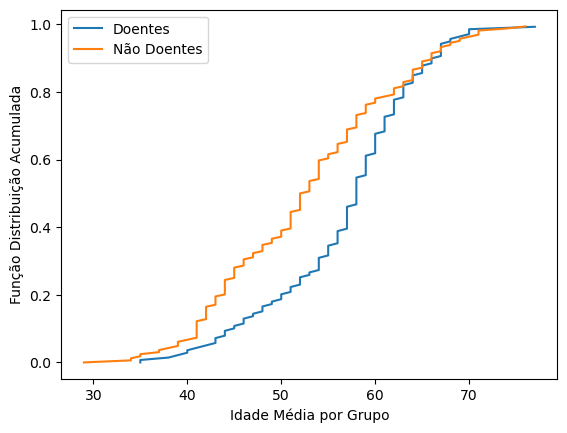

In [55]:
# Visualizando os doentes e não doentes

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Selecione os dados para os doentes (flag_doente == 1)
score_pop1 = df.loc[df['flag_doente'] == 1, 'age']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Doentes')

# Selecione os dados para os não doentes (flag_doente != 1)
score_pop2 = df.loc[df['flag_doente'] != 1, 'age']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Não Doentes')

ax.legend()

ax.set_xlabel('Idade Média por Grupo')
ax.set_ylabel('Função Distribuição Acumulada')

plt.show()
